In [59]:
#Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [60]:
data = load_iris()

In [61]:
print(data.target.shape)

(150,)


In [62]:
X = data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [63]:
Y = data.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
# Code for randomly shuffling the dataset
X_sparse = coo_matrix(X)
X,X_sparse, y = shuffle(X,X_sparse, Y, random_state=0)
X = X_sparse.toarray()
Y = y

In [65]:
print(X.shape)

(150, 4)


In [66]:
Y = Y.reshape(150,1)
Y

array([[2],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
    

In [67]:
# Dividing the dataset into training and testing
train_X = X[0:125,:]
train_Y = Y[0:125,:]
test_X = X[125:,:]
test_Y = Y[125:,:]

In [68]:
def sigmoid(X):
    for i in range(0,X.shape[0]):
        X[i] = 1/(1+np.exp(-1*X[i]))
    return X

In [69]:
def diffSigmoid(X):
    for i in range(0,len(X)):
        y = 1/(1+np.exp(-1*X[i]))
        X[i] = y*(1-y)
    return X

In [70]:
print(Y.shape)

(150, 1)


In [71]:
# Random initializtion of Weights Matrices
# Model contains 4 layers having 4->8->8->3 neurons respectively

w12 = np.random.rand(8,4)
b1 = np.random.rand(8,1)
w23 = np.random.rand(8,8)
b2 = np.random.rand(8,1)
w34 = np.random.rand(3,8)
b3 = np.random.rand(3,1)

In [72]:
print(w23)

[[5.68587251e-02 4.06003002e-01 9.24134130e-01 8.15537983e-01
  5.01637909e-02 6.75797403e-01 6.25894544e-01 6.62967432e-01]
 [4.87540447e-04 6.07935578e-01 1.49974538e-02 2.28230753e-01
  8.79731961e-01 7.32467602e-01 4.53794240e-01 6.29593097e-02]
 [9.85999946e-01 7.16804741e-01 1.08894933e-01 3.09874756e-01
  5.31626198e-01 5.58860854e-01 7.09455153e-01 6.07671311e-01]
 [5.34012518e-01 1.46694218e-01 8.77551715e-01 5.60874549e-01
  8.02842518e-01 6.70544993e-01 6.97442148e-01 4.68546771e-01]
 [1.99726448e-02 5.47888106e-01 7.05933189e-01 8.93413394e-01
  1.56607732e-01 3.71356698e-01 9.62788943e-01 6.89099595e-01]
 [2.37631126e-01 1.24654329e-01 9.22894656e-01 3.88767448e-01
  2.71763649e-01 5.30363448e-01 5.01396105e-01 3.93290842e-01]
 [6.80452350e-01 1.44087646e-01 9.90551048e-01 9.92362645e-01
  8.30620134e-01 1.00604624e-02 6.98011388e-01 8.56279459e-01]
 [7.43292039e-01 1.17376792e-01 1.34988044e-01 6.86589348e-01
  3.59191193e-01 7.01727568e-01 1.81926845e-01 6.47748520e-01]]

In [73]:
def forwardPropagation(X,Y,dict2):
    dict = {}
    w12 = dict2["w12"]
    w23 = dict2["w23"]
    w34 = dict2["w34"]
    b1 = dict2["b1"]
    b2 = dict2["b2"]
    b3 = dict2["b3"]
    
    X = np.asarray(X)
    X = X.reshape((4,1))
    
    net1 = np.dot(w12,X) + b1
    a1 = sigmoid(net1)
    net2 = np.dot(w23,a1) + b2
    a2 = sigmoid(net2)
    net3 = np.dot(w34,a2) + b3
    a3 = sigmoid(net3)
    
    error = 1/2*np.sum(pow((Y-a3),2))
    
    dict["a1"] = a1
    dict["a2"] = a2
    dict["a3"] = a3
    dict["net1"] = net1
    dict["net2"] = net2
    dict["net3"] = net3
    dict["err"] = error
    
    return dict

In [74]:
def BackPropagation(X,y,alpha,dict,dict2):
    a1 = dict["a1"]
    a2 = dict["a2"]
    a3 = dict["a3"]
    net1 = dict["net1"]
    net2 = dict["net2"]
    net3 = dict["net3"]
    error = dict["err"]
    w12 = dict2["w12"]
    w23 = dict2["w23"]
    w34 = dict2["w34"]
    b1 = dict2["b1"]
    b2 = dict2["b2"]
    b3 = dict2["b3"]
    
    y1 = np.zeros((3,1))
    y1[y] = 1
    
    a3 = a3.reshape((3,1))
    a2 = a2.reshape((8,1))
    a1 = a1.reshape((8,1))
    
    X = np.asarray(X)
    X = X.reshape((4,1))
    
    temp = np.multiply(a3-y1,np.multiply(a3,np.ones(a3.shape)-a3))
    temp2 = np.multiply(np.dot(temp.transpose(),w34).T,np.multiply(a2,np.ones(a2.shape)-a2))
    temp3 = np.multiply(np.dot(temp2.transpose(),w23).T,np.multiply(a1,np.ones(a1.shape)-a1))
    
    w34 = w34 - (alpha)*(np.dot(temp,a2.T))
    b3 = b3 - (alpha)*temp
    w23 = w23 - (alpha)*(np.dot(temp2,a1.T))
    b2 = b2 - (alpha)*temp2
    w12 = w12- (alpha)*(np.dot(temp3,X.T))
    b1 = b1 - (alpha)*temp3
    
    dict2["w12"] = w12
    dict2["w23"] = w23
    dict2["w34"] = w34
    dict2["b1"] = b1
    dict2["b2"] = b2
    dict2["b3"] = b3
    
    return dict2

In [75]:
def main(X,y):
    max_iter = 10
    alpha = 0.01
    weights = {}
    cost_list = []
    weights["w12"] = w12
    weights["w23"] = w23
    weights["w34"] = w34
    weights["b1"] = b1
    weights["b2"] = b2
    weights["b3"] = b3
    weights["No_of_Iter"] = max_iter
    
    while(True):
        for i in range(1,X.shape[0]):
            d1 = forwardPropagation(X[i],y[i],weights)
            weights = BackPropagation(X[i],y[i],alpha,d1,weights)
            curr_error = d1["err"]
            
        max_iter = max_iter - 1
        if(max_iter < 0):
            break
        final = d1["err"]
        cost_list.append(final)
    weights['cost'] = cost_list
    return weights

ans = main(train_X,train_Y)
u = ans["w23"]
print(u)

[[ 0.05756269  0.40670738  0.92484298  0.8162435   0.05086736  0.67650106
   0.62660079  0.66367101]
 [-0.00533995  0.6021079   0.00916542  0.22240258  0.87390489  0.72664148
   0.44796439  0.05713228]
 [ 0.98409465  0.7148995   0.10698947  0.30796969  0.52972094  0.55695597
   0.70754969  0.60576607]
 [ 0.53215152  0.14483335  0.87569133  0.55901402  0.8009815   0.66868435
   0.69558135  0.46668577]
 [ 0.01803846  0.54595431  0.70400257  0.89148069  0.15467329  0.36942277
   0.96085632  0.68716518]
 [ 0.23633182  0.12335626  0.92160875  0.38747281  0.27046332  0.52906388
   0.50010293  0.39199055]
 [ 0.67948593  0.14312121  0.98958407  0.99139618  0.82965377  0.00909426
   0.69704467  0.8553131 ]
 [ 0.74300898  0.11709453  0.13471377  0.68630931  0.35890746  0.70144426
   0.18164782  0.64746481]]


In [76]:
pred = forwardPropagation(test_X[19],test_Y[19],ans)
print(pred["a3"])
print(test_Y[19])

[[0.39405663]
 [0.93589443]
 [0.99466295]]
[0]


In [77]:
test_X.shape

(25, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

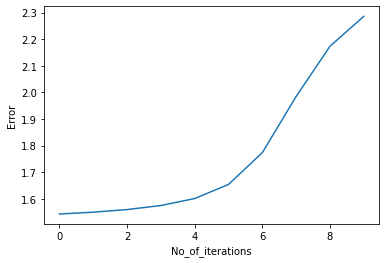

In [78]:
i = ans['No_of_Iter']
iter = np.arange(0,i)
error = ans['cost']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show